<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Clustering%20and%20Unsupervised%20Learning/Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical procedure used to reduce the number of features within a dataset.

## 1. Understand Pricipal Component Analysis


### 1.1 PCA Algorithm

Training set: $x^{(1)}, x^{(2)},...,x^{(m)} \quad\in\mathbb{R}^n$

1.   Normalize the data to have a mean of 0 and standard deviation of 1.

> $\displaystyle x_j^{(i)}\leftarrow\displaystyle\frac{x_j^{(i)}-\mu_j}{\sigma_j}\quad$

>  $\displaystyle\mbox{where}\quad\quad\mu_j = \frac{1}{m}\sum_{i=1}^mx_j^{(i)}\quad\quad\mbox{and}\quad\quad\sigma_j^2=\frac{1}{m}\sum_{i=1}^m(x_j^{(i)}-\mu_j)^2$

2. Compute covariance matrix,

> $\displaystyle\Sigma\quad=\quad\frac{1}{m}X^{T}X\quad=\quad\frac{1}{m}\sum_{i=1}^nx^{(i)}{x^{(i)}}^T\quad\in\mathbb{R}^{n\times n}$

> Note: $\Sigma\in\mathbb{R}^{n\times n}$, it is a $n\times n$ matrix, not a summation operator here.

3. Compute eigenvectors of matrix $\Sigma$ with [Singular Value Decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition), Python has np.linalg.svd() function to perform the calculation.

> $u_1, ..., u_k\in\mathbb{R}^n$, the $k$ orthogonal principal eigenvectors of $\Sigma$, i.e. the orthogonal eigenvectors of the $k$ largest eigenvalues. 

4. Project the data on $\textrm{span}_\mathbb{R}(u_1,...,u_k)$


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 12})
sns.set_style('whitegrid')

### 1.2 Generate a 2-D dataset, apply PCA to one component, and visualize the results

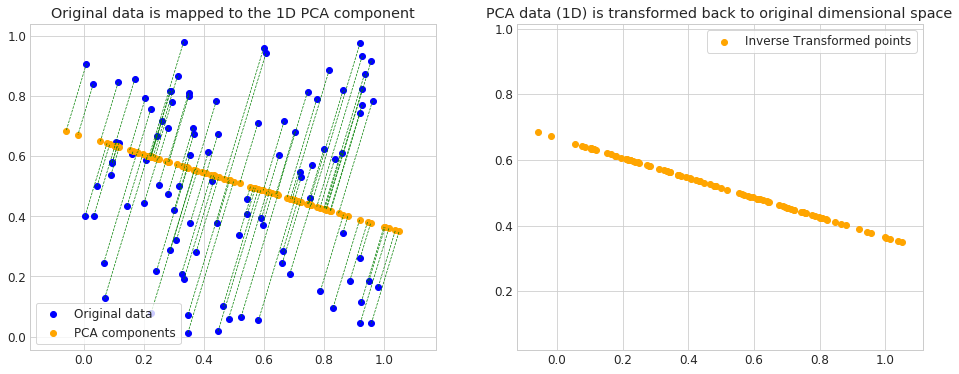

In [87]:
pca = PCA(1)
X = np.random.rand(100, 2)
X_pca = pca.fit_transform(X)
X_reverse = pca.inverse_transform(X_pca)


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
#fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.5)


ax[0].scatter(X[:, 0], X[:, 1], label='Original data', c='blue')
ax[0].scatter(X_reverse[:, 0], X_reverse[:, 1], label='PCA components', c='orange')
[ax[0].plot([X[i, 0], X_reverse[i, 0]], [X[i, 1], X_reverse[i, 1]], c='g', linestyle='dashed', linewidth=0.7 ) for i in range(100)]
ax[0].legend(frameon=True)
ax[0].axis('equal');
ax[0].set(title='Original data is mapped to the 1D PCA component')

ax[1].scatter(X_reverse[:, 0], X_reverse[:,1], label='Inverse Transformed points', c='orange')
ax[1].legend(frameon=True)
ax[1].axis('equal');
ax[1].set(title='PCA data (1D) is transformed back to original dimensional space')

plt.show()

### 1.3 Generate a random dataset, and apply PCA to two components, and visualize the results

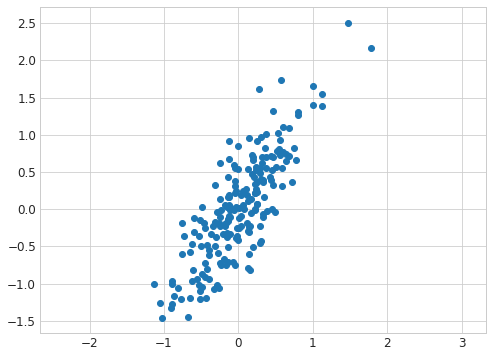

In [55]:
rng = np.random.RandomState(2)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
#X = np.random.rand(200, 2)

plt.figure(1, figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()


In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [57]:
print("Components_:\n", pca.components_)
print("Explained variance:\n", pca.explained_variance_)

Components_:
 [[ 0.51517079  0.85708754]
 [-0.85708754  0.51517079]]
Explained variance:
 [0.67663501 0.05315297]


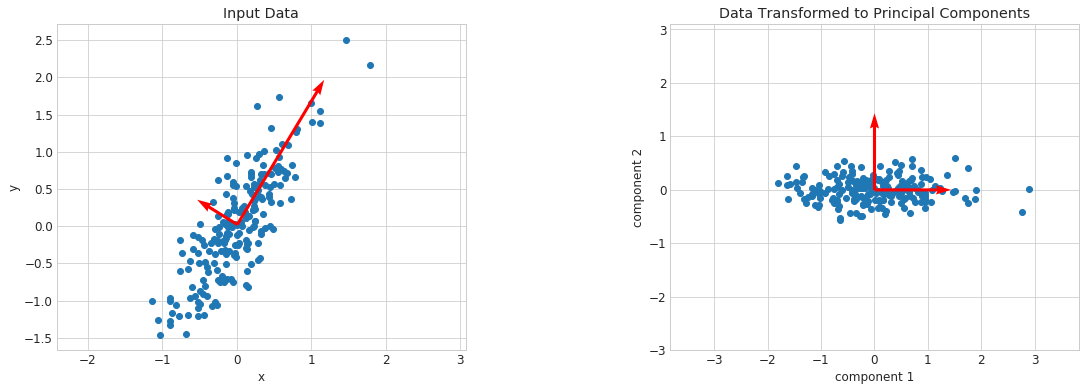

In [58]:
def draw_vector(v0, v1, ax=None):
    ax.quiver(v0[0], v0[1], v1[0], v1[1], color=['r','b','g'], scale=16)


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.5)

# plot data
ax[0].scatter(X[:, 0], X[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length) * 8
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='Input Data')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1])
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='Data Transformed to Principal Components',
          xlim=(-5, 5), ylim=(-3, 3.1))
plt.show()

## 2. Dimension Reduction for Visualization of Boston Dataset

### 2.1 Load Boston Dataset

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

In [0]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

In [0]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
print(bos.head())
print(bos.describe())

bos = bos.loc[bos["PRICE"] < 50.0]

In [0]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(bos, 
                 x_vars=boston.feature_names,
                 y_vars=["PRICE"])
plt.show()

### 2.2. Dimension Reduction for Visualization

From the dataset description we understand that there are 13 features. We want to visualize the PRICE in a two-dimensional space, the PRICE is in y-axis, so we want to reduce multiple features into one-dimensional as x_axis.

***2.2.1 PCA 1***

We will reduce five features --  "CRIM","NOX","TAX","DIS","LSTAT" into one dimension, and visualize it with Price in a 2-D plot.


In [0]:
pca_features = ["CRIM","NOX","TAX","DIS","LSTAT"]
X = bos.loc[:, pca_features].values
y = bos.loc[:,["PRICE"]].values

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [0]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

In [0]:
fig = plt.figure(1, figsize=(10,8))

ax = sns.regplot(x=X_pca, y=y.reshape(y.shape[0]), 
                 scatter_kws={"color": "blue"}, 
                 line_kws={"color": "red"})
ax.set_title( "Prices vs Reduced Dimension", fontsize=20 )
ax.set_ylabel("PRICE", fontsize=16)
ax.set_xlabel("Dimension reduced from %s" % pca_features, fontsize=16)
ax.grid(True)

plt.show()

***2.2.2 PCA 2***

Similarly we will reduce three features -- "RM","B","ZN" into one dimension, and visualize it with Price in a 2-D plot.

In [0]:
pca_features = ["RM","B","ZN"]
X = bos.loc[:, pca_features].values
y = bos.loc[:,["PRICE"]].values

sc = StandardScaler()
X = sc.fit_transform(X)

In [0]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

In [0]:
fig = plt.figure(1, figsize=(10,8))

ax = sns.regplot(x=X_pca, y=y.reshape(y.shape[0]), 
                 scatter_kws={"color": "blue"}, 
                 line_kws={"color": "red"})
ax.set_title( "Prices vs Reduced Dimension", fontsize=20 )
ax.set_ylabel("PRICE", fontsize=16)
ax.set_xlabel("Dimension reduced from %s" % pca_features, fontsize=16)
ax.grid(True)

plt.show()

## 3. Principal Component Analysis (PCA) for Image Compression


https://pythonmachinelearning.pro/face-recognition-with-eigenfaces/


### 3.1 Load Eigenfaces dataset


In [0]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
print("Total Images:", X.shape[0])
print("Image size:", w, "by", h)


### 3.2 Apply PCA
Each original image is 47x62=2914 pixels, which means each image has 2914 features, we will use PCA to compress it down to less features.

In [0]:
# Compute a PCA 
n_components = 80
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
 
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [0]:
print( "Original image size:", X_train.shape[1])
print( "PCA'ed image size:", X_train_pca.shape[1])
print( "Information retained after PCA transform from 2914 pixels to", n_components, "features is:", pca.explained_variance_ratio_.sum() )

### 3.3 Train the Neural Network

Then we will define a neural network using sklearn.newral_network libraries, and train the neural network with the PCA'ed image dataset.


In [0]:
# train a neural network
from sklearn.neural_network import MLPClassifier

print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

In [0]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

### 3.4 Visualize the image data with true and predicted values

In [0]:
# Visualization
def plot_gallery(images, titles, h, w, rows=5, cols=10):
    plt.figure(figsize=(16,12))
    plt.subplots_adjust(wspace=0.1, hspace=0.3)
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles is not None:
            plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'pred: {0}\ntrue: {1}'.format(pred_name, true_name)        

prediction_titles = list(titles(y_pred, y_test, target_names))        
plot_gallery(X_test, prediction_titles, h, w)

### 3.5 Revers the PCA'ed images back to their original size, and visualize them

We will notice that the PCA'ed images have about 90% information retained, compared with above original images.

The exact information retain rate can be obtained by:

> *pca.explained_variance_ratio_.sum()*, or 

> *pca.explained_variance_ratio_.cumsum()*

In [0]:
X_test_pca_reverse = pca.inverse_transform(X_test_pca)
plot_gallery(X_test_pca_reverse, prediction_titles, h, w)